# Moon Landing Analysis

## About Dataset


#### Historic Space Missions
The dataset chronicles a range of historic space missions that collectively represent humanity's pursuit of lunar exploration.

#### Evolution of Technology and Determination
The dataset showcases the progression of spacefaring technology and human determination, from early attempts like Pioneer 0 to recent successes like Chandrayaan 3's soft landing.

#### Mission Details
Navigating the dataset reveals information about each mission, including names, launch dates, carrier rockets, operators, mission types, outcomes, and additional details.

#### Triumphs and Failures
The dataset highlights both successes and failures, such as Luna E-1 No.1's disintegration due to excessive vibration and Luna 2's achievement as the first human-made object to touch the Moon's surface.

#### Chandrayaan 3
References to Chandrayaan 3, a recent successful soft lunar landing, underscore the dataset's coverage of significant achievements.

#### Future Space Race
The dataset hints at a future space race that promises to extend lunar conquest, suggesting ongoing and upcoming efforts in space exploration.

#### Memorializing the Past and Envisioning the Future
Beyond documenting the past, the dataset offers insights into the captivating trajectory of future space exploration, emphasizing humanity's ambition to explore beyond Earth and leave a mark on the Moon.

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### UnicodeDecodeError: 'utf-8' codec can't decode byte 0x96 in position 18803: invalid start byte
Incase while Loading the Dataset will you facing the above error- try with (encoding='latin1')

## Load the Dataset

In [2]:
dataset = pd.read_csv(r"C:\Users\kishk\Downloads\Moonlanding.csv", encoding='latin1')

## head()

In [3]:
dataset.head()

,Mission,Spacecraft,Launch Date,Carrier Rocket,Operator,Mission Type,Outcome,Additional Information
0,Pioneer 0 (Able I),Pioneer 0,17-Aug-58,Thor DM-18 Able I,United States USAF,Orbiter,Launch failure,First attempted launch beyond Earth orbit; fai...
1,Luna E-1 No.1,Luna E-1 No.1,23-Sep-58,Luna,Soviet Union OKB-1,Impactor,Launch failure,Failed to orbit; rocket disintegrated due to e...
2,Pioneer 1 (Able II),Pioneer 1,11-Oct-58,Thor DM-18 Able I,United States NASA,Orbiter,Launch failure,Failed to orbit; premature second-stage cutoff...
3,Luna E-1 No.2,Luna E-1 No.2,11-Oct-58,Luna,Soviet Union OKB-1,Impactor,Launch failure,Failed to orbit; carrier rocket exploded due t...
4,Pioneer 2 (Able III),Pioneer 2,08-Nov-58,Thor DM-18 Able I,United States NASA,Orbiter,Launch failure,Failed to orbit; premature second-stage cutoff...


## shape

In [4]:
print(dataset.shape)

(158, 8)


In [5]:
dataset.dtypes

Mission                   object
Spacecraft                object
Launch Date               object
Carrier Rocket            object
Operator                  object
Mission Type              object
Outcome                   object
Additional Information    object
dtype: object

In [6]:
dataset.index

RangeIndex(start=0, stop=158, step=1)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Mission                 158 non-null    object
 1   Spacecraft              158 non-null    object
 2   Launch Date             158 non-null    object
 3   Carrier Rocket          158 non-null    object
 4   Operator                158 non-null    object
 5   Mission Type            158 non-null    object
 6   Outcome                 158 non-null    object
 7   Additional Information  157 non-null    object
dtypes: object(8)
memory usage: 10.0+ KB


## columns

In [44]:
dataset.columns

Index(['Mission', 'Spacecraft', 'Launch Date', 'Carrier Rocket', 'Operator',
       'Mission Type', 'Outcome', 'Additional Information'],
      dtype='object')

In [45]:
dataset.describe()

,Mission,Spacecraft,Launch Date,Carrier Rocket,Operator,Mission Type,Outcome,Additional Information
count,158,158,158,158,158,158,158,157
unique,147,158,124,51,22,13,6,151
top,Chang'e 5,Pioneer 0,16-Nov-22,Proton-K/D,United States NASA,Orbiter,Successful,Returned lunar samples on 16 December 2020. Or...
freq,4,1,11,24,61,59,78,4


In [46]:
dataset['Mission Type'].value_counts()

Orbiter                            59
Lander                             38
Flyby                              31
Impactor                           15
Rover                               4
Orbiter,Lander,Rover                2
Lander,Sample Return                2
Flybys                              2
Crewed orbiter                      1
Flyby / Impactor (post mission)     1
Relay Satellite                     1
Launch Vehicle                      1
Sample Return                       1
Name: Mission Type, dtype: int64

In [47]:
dataset.isna().sum()

Mission                   0
Spacecraft                0
Launch Date               0
Carrier Rocket            0
Operator                  0
Mission Type              0
Outcome                   0
Additional Information    1
dtype: int64

In [48]:
tot_count=dataset.Operator.value_counts()

In [49]:
tot_count.columns=['Space_Stations','Mission_Count']

In [50]:
df=pd.DataFrame(tot_count)
df.columns=['Mission_Count']
df.set_index='Space_Stations'
df.reset_index(names=['Space_Stations'],inplace=True)

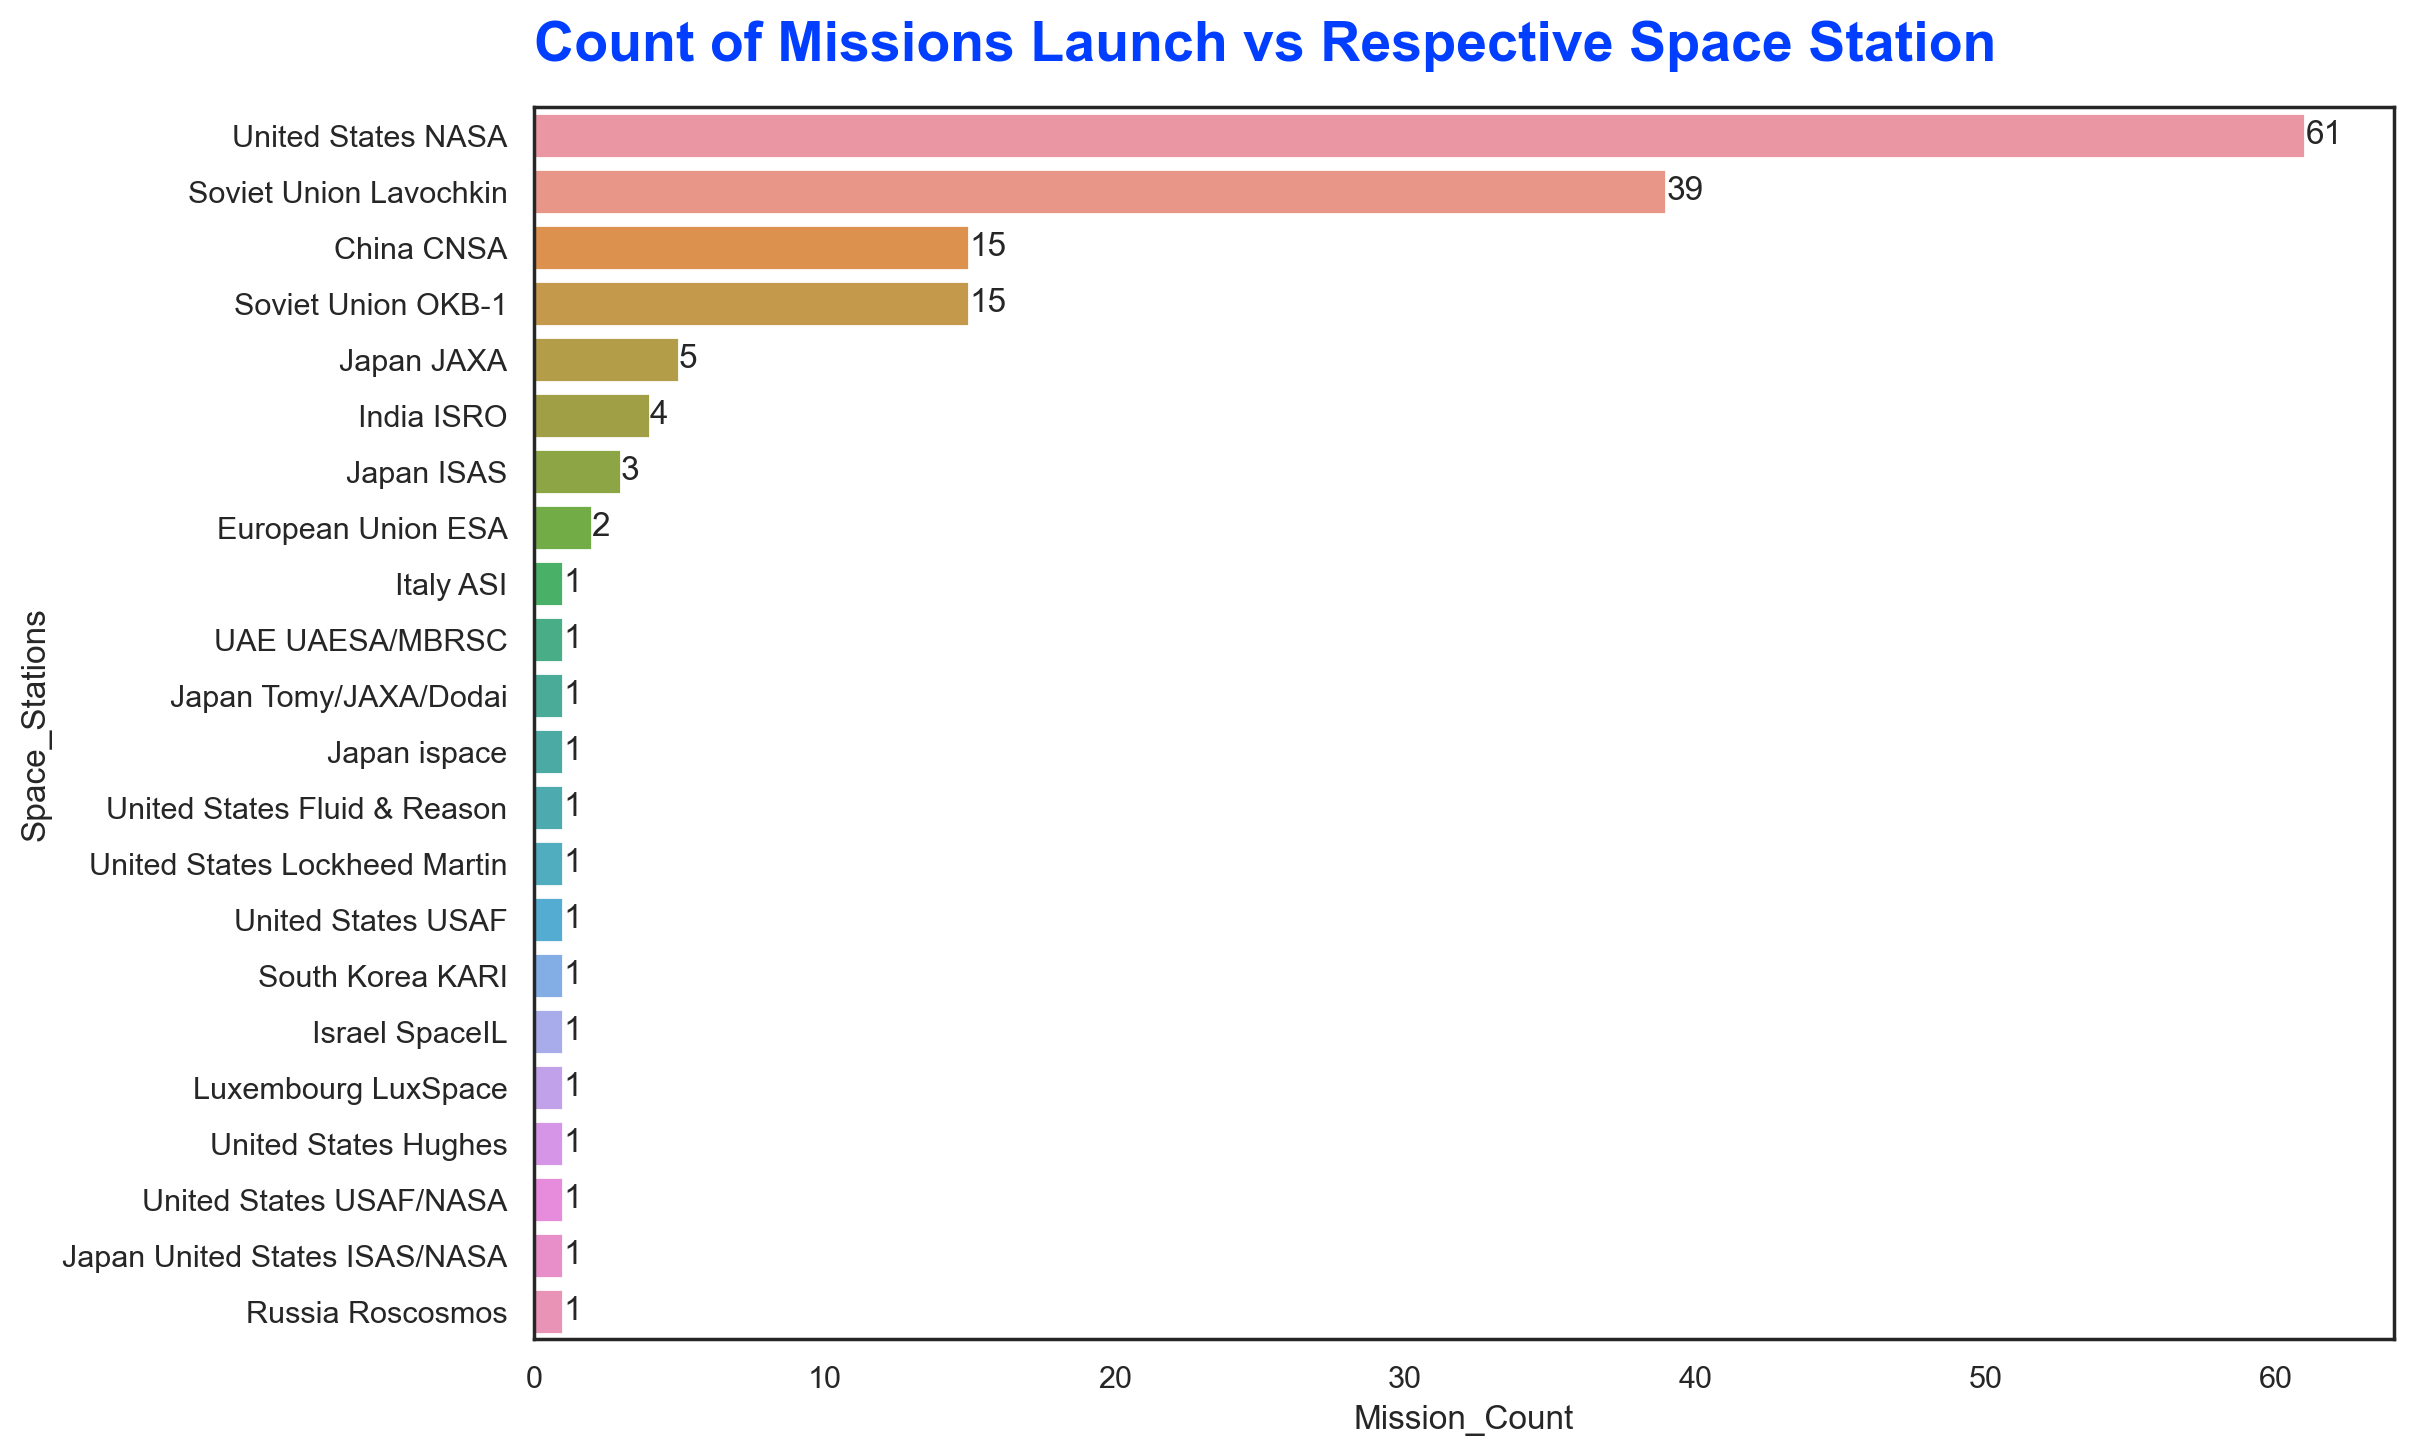

In [51]:
sns.set_theme(style='white',palette='bright')
plt.figure(figsize=(12,8),dpi=200)
a=sns.barplot(x='Mission_Count', y='Space_Stations',data=df)
for i in a.containers:
    a.bar_label(i,fmt='%.0f')
plt.title('Count of Missions Launch vs Respective Space Station',fontweight='bold',size=20,color='b',pad=17,loc='left')
plt.show()

## country space stations wise that involves greater than 1 mission

In [52]:
count=tot_count[tot_count.values>1]

In [53]:
print(count)

United States NASA        61
Soviet Union Lavochkin    39
China CNSA                15
Soviet Union OKB-1        15
Japan JAXA                 5
India ISRO                 4
Japan ISAS                 3
European Union ESA         2
Name: Operator, dtype: int64


In [54]:
count.index

Index(['United States NASA', 'Soviet Union Lavochkin', 'China CNSA',
       'Soviet Union OKB-1', 'Japan JAXA', 'India ISRO', 'Japan ISAS',
       'European Union ESA'],
      dtype='object')

In [55]:
sub_count=len(count)//2

### pie chart representation of the different mission types used by various space stations in their missions.

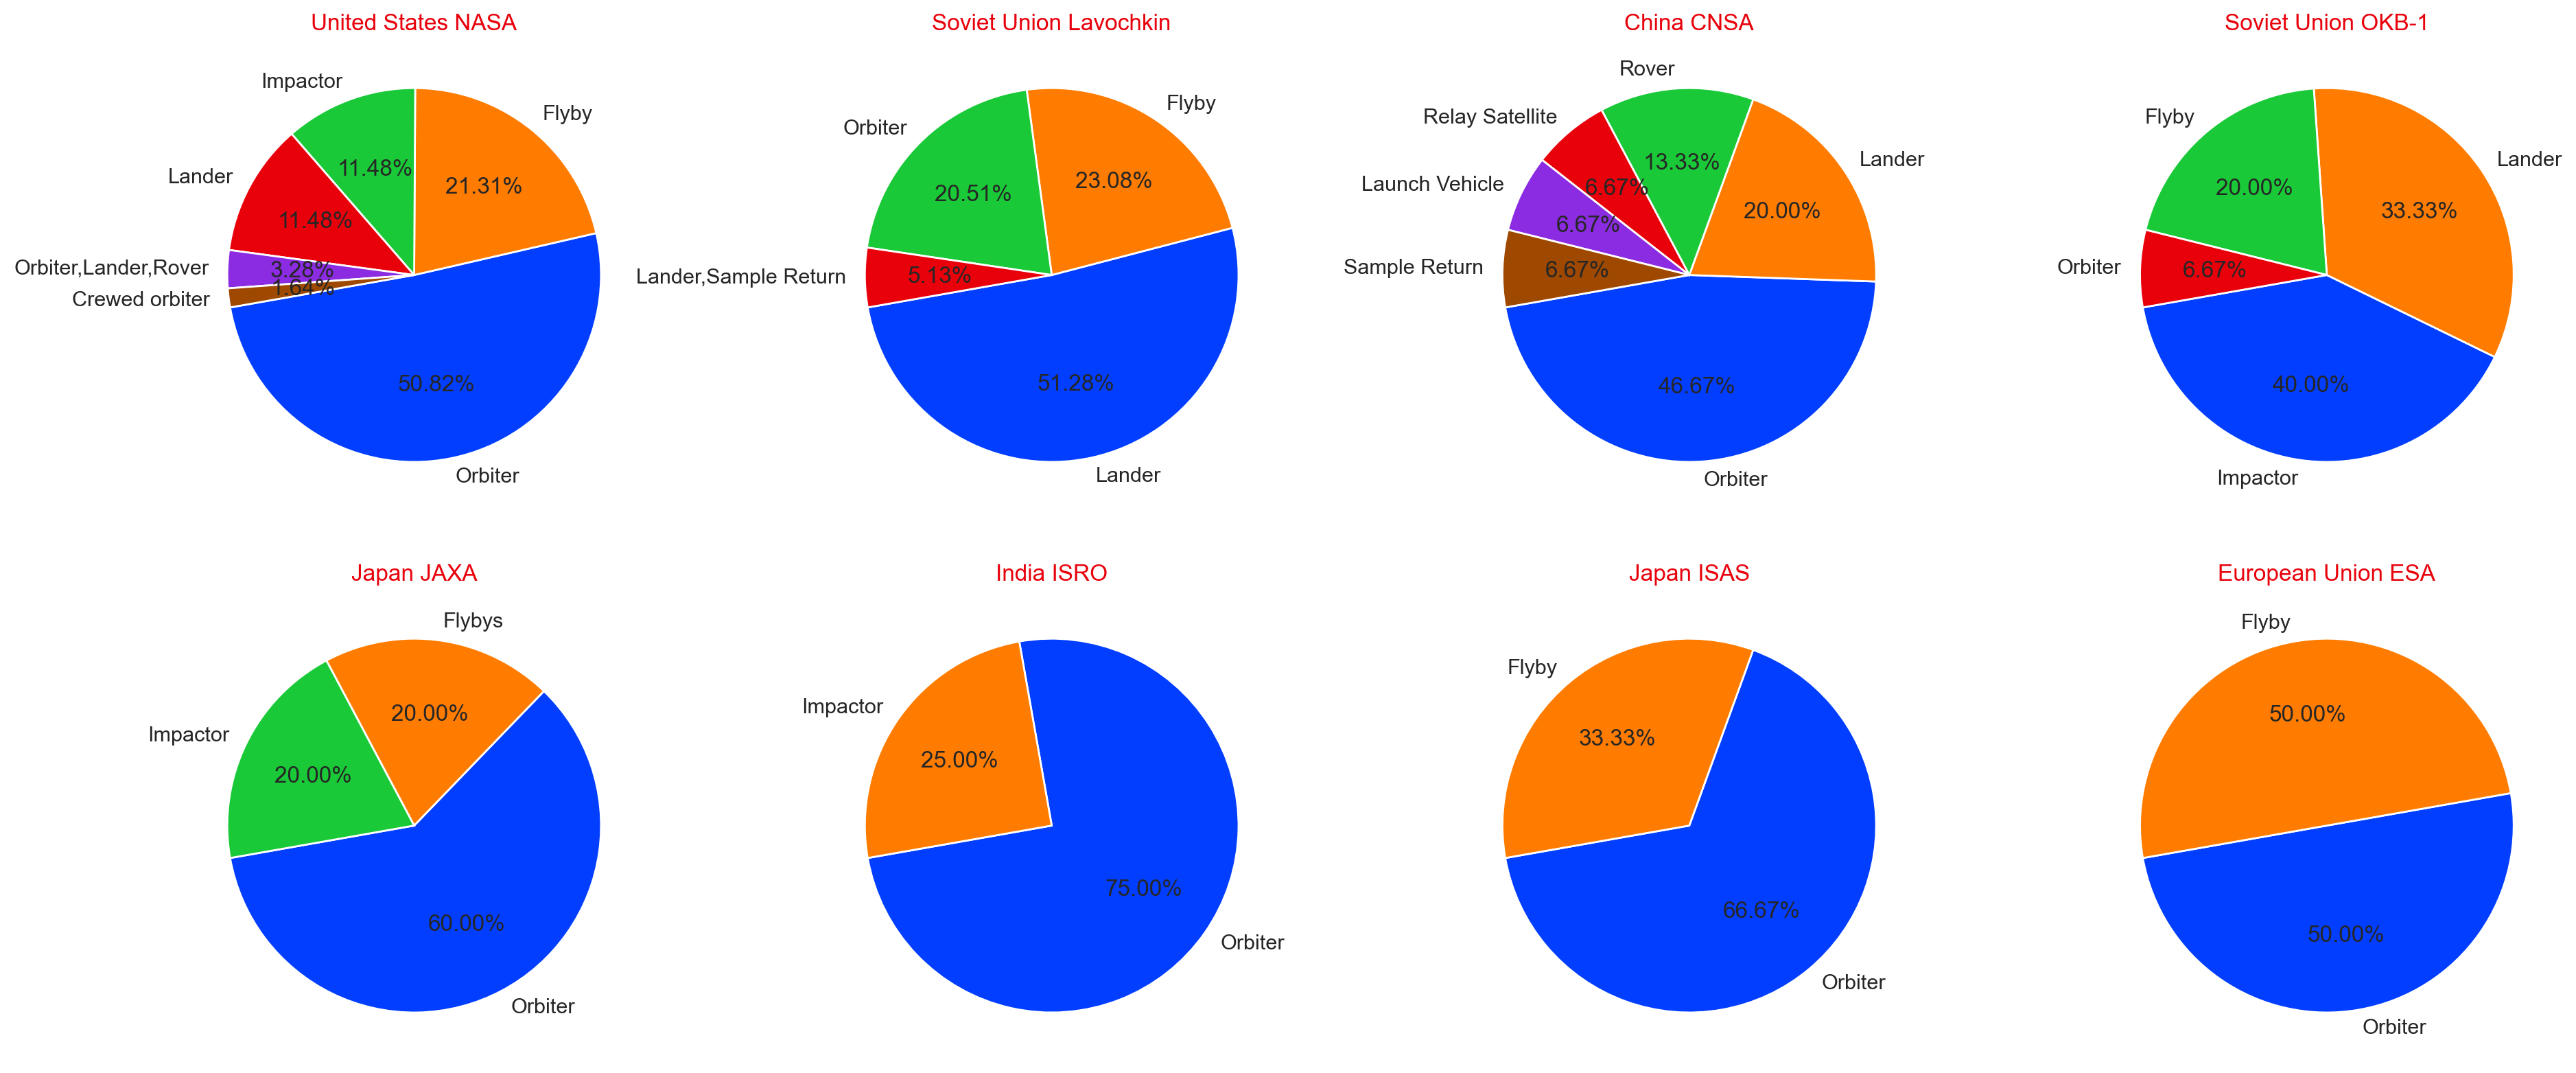

In [56]:
def countrywise(ind, ax):
    country = dataset[dataset['Operator']==ind]
    percentage = country['Mission Type'].value_counts()*100/len(country)
    ax.pie(country['Mission Type'].value_counts(),
    labels=percentage.index,
    autopct='%.2f%%',
    startangle=190,
    radius=1,
    )
    ax.set_title(ind, color='r')

fig,ax = plt.subplots(2,4,figsize=(18.8,8.2),dpi=200)
for i, operator in enumerate(count.index):
 row = i // 4
 col = i % 4
 countrywise(operator,ax[row,col])
plt.tight_layout()
plt.show()

In [57]:
dataset.Outcome.unique()

array(['Launch failure', 'Partial failure', 'Successful',
       'Spacecraft failure', 'Operational', 'En route'], dtype=object)

In [58]:
data=dataset[['Operator','Outcome']].value_counts()

In [59]:
data=pd.DataFrame(data)
data.reset_index(names=['Operator','Outcome'],inplace=True)
data.rename(columns={0:'Count'},inplace=True)

In [60]:
data.loc[(data['Outcome'] != 'Successful') & (data['Outcome'] != 'Operational'), 'Outcome'] = 'Failure'

In [61]:
data

,Operator,Outcome,Count
0,United States NASA,Successful,37
1,Soviet Union Lavochkin,Successful,16
2,Soviet Union Lavochkin,Failure,12
3,Soviet Union OKB-1,Failure,11
4,United States NASA,Failure,10
5,China CNSA,Successful,9
6,Soviet Union Lavochkin,Failure,9
7,United States NASA,Failure,7
8,China CNSA,Operational,5
9,United States NASA,Operational,4


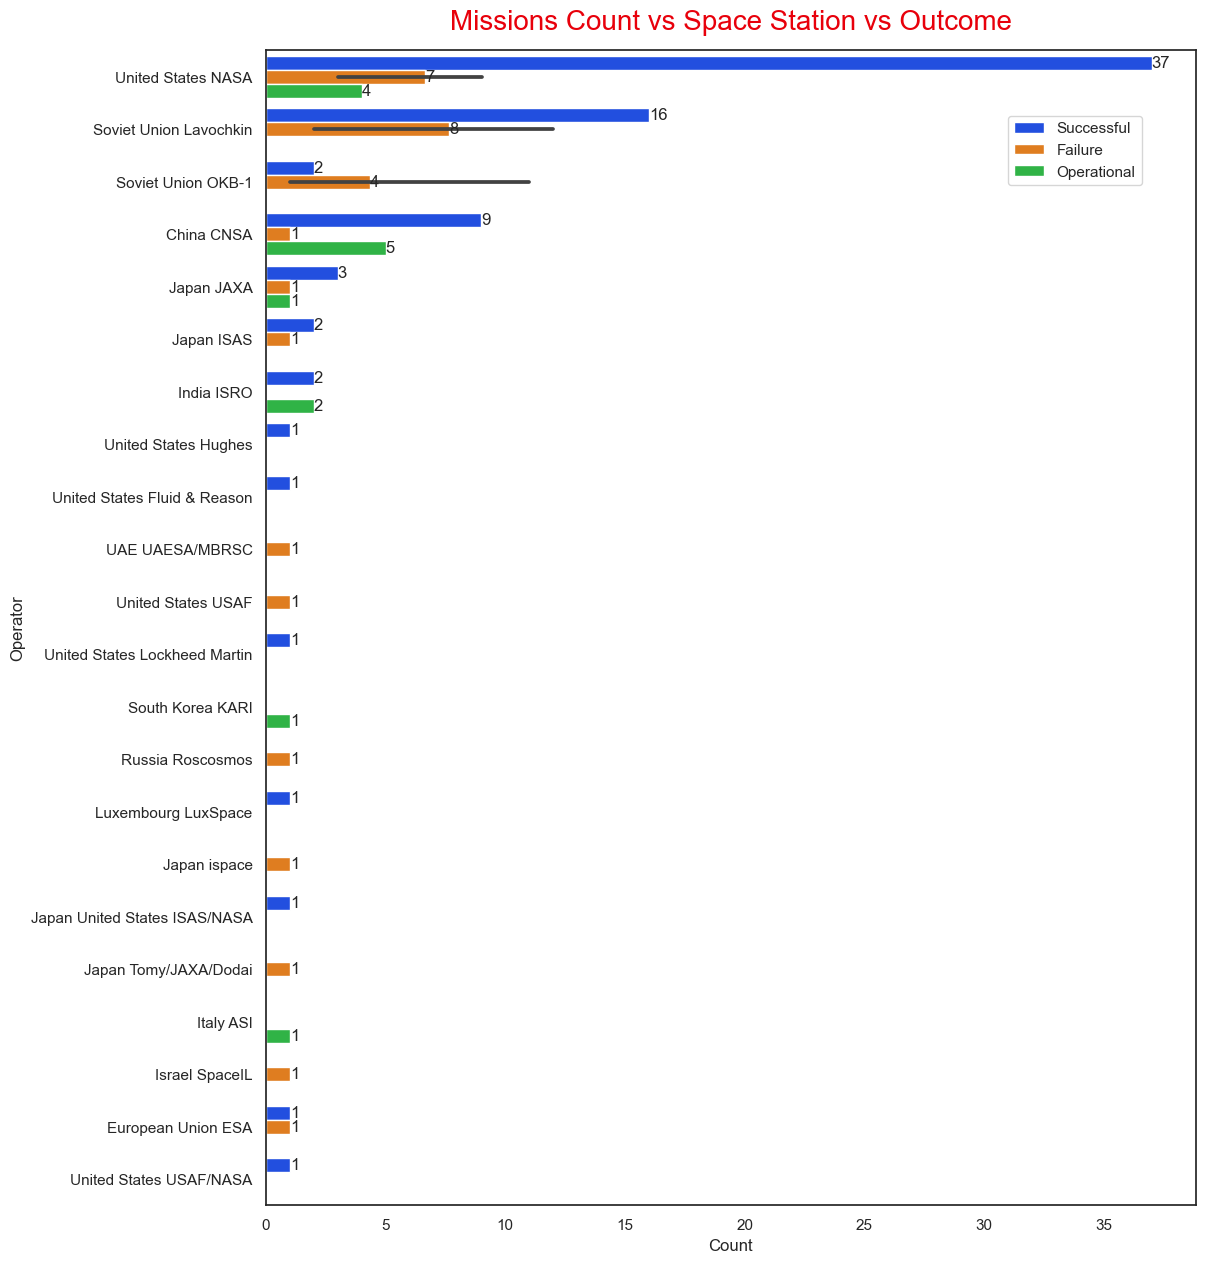

In [62]:
sns.set(style="white",palette='bright')
plt.figure(figsize=(12,15),dpi=100)
a=sns.barplot(data=data, x='Count', y='Operator', hue='Outcome')
for i in a.containers:
     a.bar_label(i,fmt='%.0f')
plt.legend(loc='upper right', bbox_to_anchor=(0.95,0.95))
plt.title("Missions Count vs Space Station vs Outcome", color='r',size=20,pad=15)
plt.show()

In [63]:
dataset.head()

,Mission,Spacecraft,Launch Date,Carrier Rocket,Operator,Mission Type,Outcome,Additional Information
0,Pioneer 0 (Able I),Pioneer 0,17-Aug-58,Thor DM-18 Able I,United States USAF,Orbiter,Launch failure,First attempted launch beyond Earth orbit; fai...
1,Luna E-1 No.1,Luna E-1 No.1,23-Sep-58,Luna,Soviet Union OKB-1,Impactor,Launch failure,Failed to orbit; rocket disintegrated due to e...
2,Pioneer 1 (Able II),Pioneer 1,11-Oct-58,Thor DM-18 Able I,United States NASA,Orbiter,Launch failure,Failed to orbit; premature second-stage cutoff...
3,Luna E-1 No.2,Luna E-1 No.2,11-Oct-58,Luna,Soviet Union OKB-1,Impactor,Launch failure,Failed to orbit; carrier rocket exploded due t...
4,Pioneer 2 (Able III),Pioneer 2,08-Nov-58,Thor DM-18 Able I,United States NASA,Orbiter,Launch failure,Failed to orbit; premature second-stage cutoff...


In [64]:
import re
import pandas as pd

def process_date(string):
    date_string = string
    pattern = r'\d{2}-[A-Za-z]{3}-(\d{2})'
    match = re.search(pattern, date_string)
    if match:
        year = match.group(1)
        convert = int(year)
        if 0 < convert < 24:
            res = '20' + year
        else:
            res = '19' + year
        return res
    return None

dataset['Converted Year'] = dataset['Launch Date'].apply(process_date)

converted_df = dataset.dropna(subset=['Converted Year']).copy()

In [65]:
converted_df.head()

,Mission,Spacecraft,Launch Date,Carrier Rocket,Operator,Mission Type,Outcome,Additional Information,Converted Year
0,Pioneer 0 (Able I),Pioneer 0,17-Aug-58,Thor DM-18 Able I,United States USAF,Orbiter,Launch failure,First attempted launch beyond Earth orbit; fai...,1958
1,Luna E-1 No.1,Luna E-1 No.1,23-Sep-58,Luna,Soviet Union OKB-1,Impactor,Launch failure,Failed to orbit; rocket disintegrated due to e...,1958
2,Pioneer 1 (Able II),Pioneer 1,11-Oct-58,Thor DM-18 Able I,United States NASA,Orbiter,Launch failure,Failed to orbit; premature second-stage cutoff...,1958
3,Luna E-1 No.2,Luna E-1 No.2,11-Oct-58,Luna,Soviet Union OKB-1,Impactor,Launch failure,Failed to orbit; carrier rocket exploded due t...,1958
4,Pioneer 2 (Able III),Pioneer 2,08-Nov-58,Thor DM-18 Able I,United States NASA,Orbiter,Launch failure,Failed to orbit; premature second-stage cutoff...,1958


In [66]:
new_set=converted_df['Converted Year'].value_counts()

In [67]:
new_set=pd.DataFrame(new_set)

In [68]:
new_set.index.name='year'
new_set.reset_index(names=['year'],inplace=True)
new_set.rename(columns={'Converted Year':'Count'},inplace=True)

In [69]:
new_set

,year,Count
0,2022,17
1,1966,11
2,1967,10
3,1965,9
4,1969,9
5,1968,7
6,1958,7
7,2018,6
8,1959,6
9,2007,6


In [70]:
new_df=new_set.sort_values(by='year',ascending=False,ignore_index=True)

In [71]:
new_df

,year,Count
0,2023,3
1,2022,17
2,2020,4
3,2019,2
4,2018,6
5,2014,3
6,2013,3
7,2011,2
8,2010,1
9,2009,2


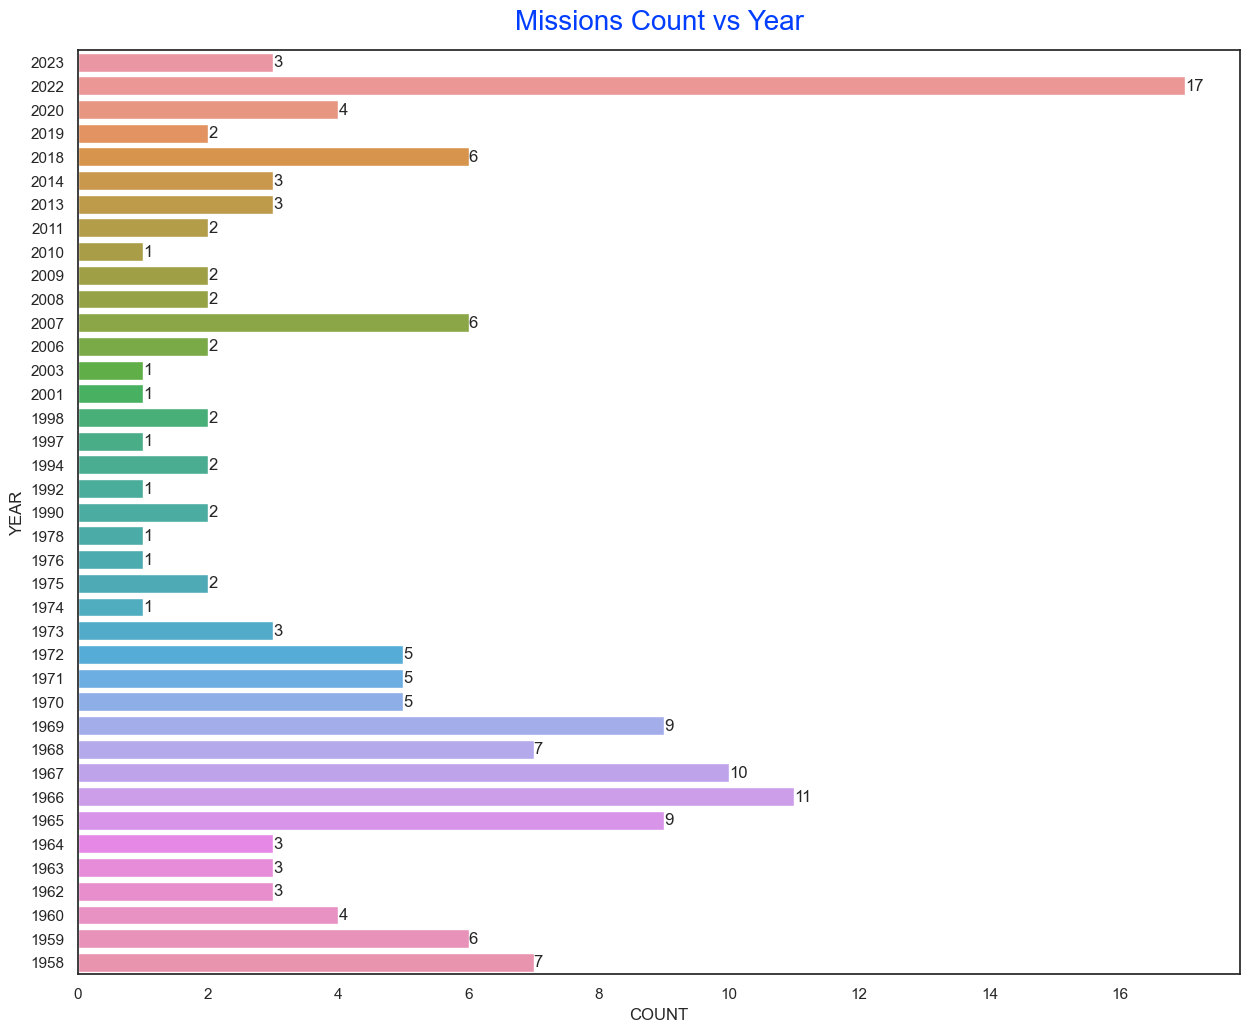

In [72]:
sns.set_theme(style="white",palette='bright')
plt.figure(figsize=(15,12),dpi=100)
a=sns.barplot(data=new_df, x='Count', y='year')
for i in a.containers:
    a.bar_label(i,fmt='%.0f')
plt.title("Missions Count vs Year", color='b',size=20,pad=15)
plt.xlabel('COUNT')
plt.ylabel('YEAR')
plt.show()

In [73]:
india=converted_df[converted_df.Operator=='India ISRO']

In [74]:
dataset.describe()

,Mission,Spacecraft,Launch Date,Carrier Rocket,Operator,Mission Type,Outcome,Additional Information,Converted Year
count,158,158,158,158,158,158,158,157,158
unique,147,158,124,51,22,13,6,151,39
top,Chang'e 5,Pioneer 0,16-Nov-22,Proton-K/D,United States NASA,Orbiter,Successful,Returned lunar samples on 16 December 2020. Or...,2022
freq,4,1,11,24,61,59,78,4,17


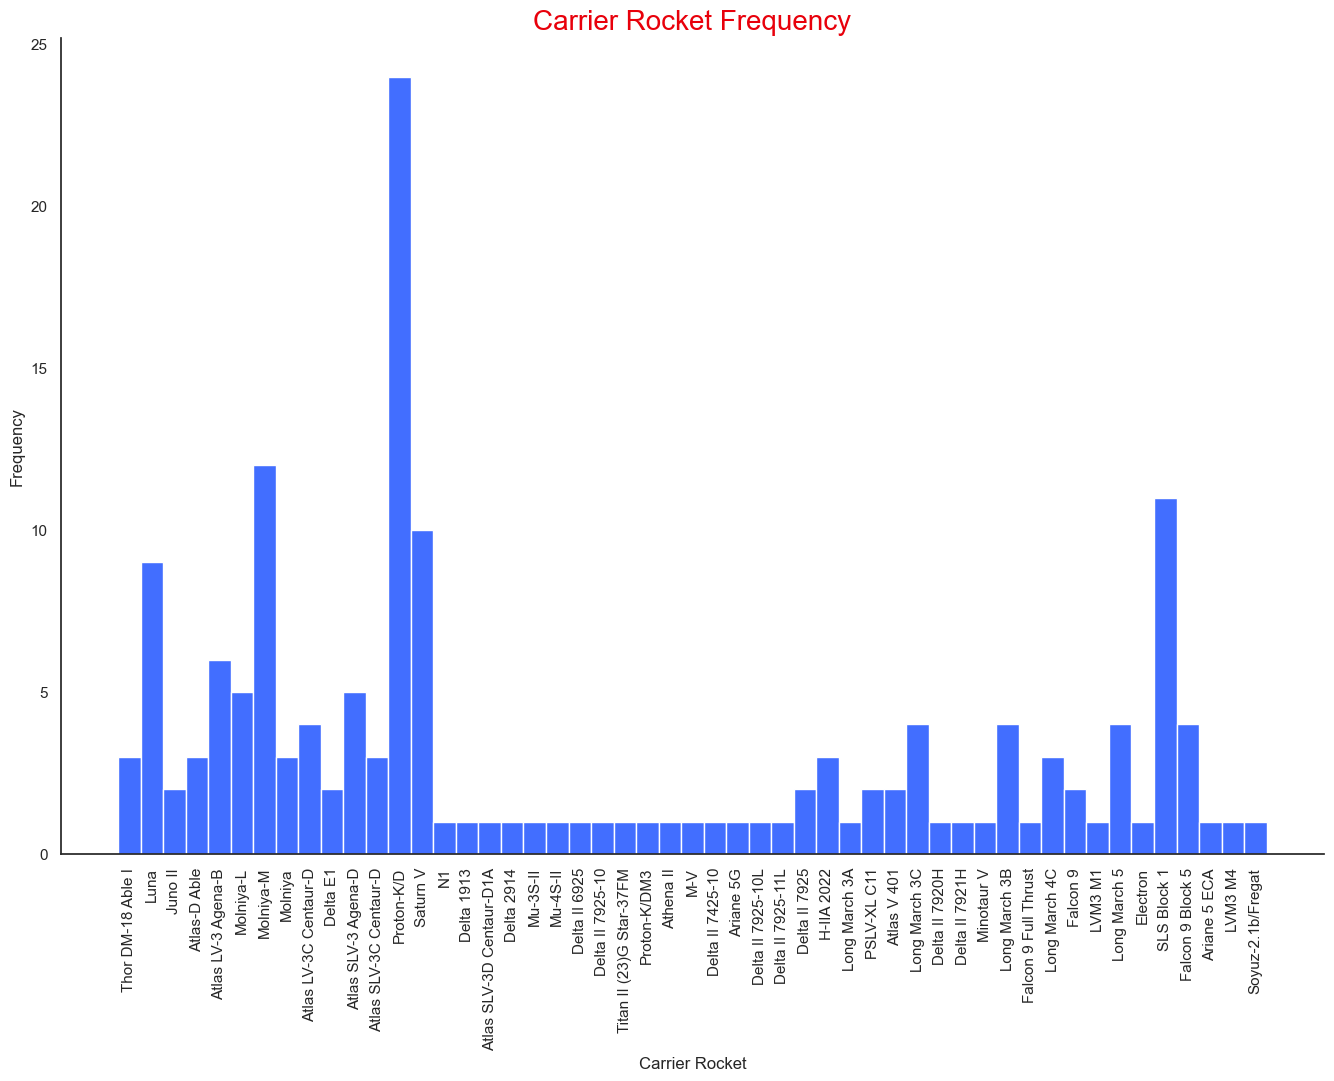

In [75]:
sns.displot(x='Carrier Rocket',data=dataset,kind='hist',stat='frequency',height=9,aspect=1.5)
plt.xticks(rotation=90)
plt.title('Carrier Rocket Frequency', size=20, color='r')
plt.show()

In [76]:
india['Converted Year']=india['Converted Year'].astype(int)

In [77]:
india

,Mission,Spacecraft,Launch Date,Carrier Rocket,Operator,Mission Type,Outcome,Additional Information,Converted Year
113,Chandrayaan-1,Chandrayaan-1,22-Oct-08,PSLV-XL C11,India ISRO,Orbiter,Successful,"Moon Impact Probe deployed, discovered water i...",2008
114,Chandrayaan-1,Moon Impact Probe,22-Oct-08,PSLV-XL C11,India ISRO,Impactor,Successful,"Moon Impact Probe deployed, discovered water i...",2008
133,Chandrayaan-2,Chandrayaan-2 Orbiter,22-Jul-19,LVM3 M1,India ISRO,Orbiter,Operational,"Orbiter operational, but Lander and Rover were...",2019
156,Chandrayaan-3,Chandrayaan-3,14-Jul-23,LVM3 M4,India ISRO,Orbiter,Operational,Lander and rover operational. Soft-landed near...,2023


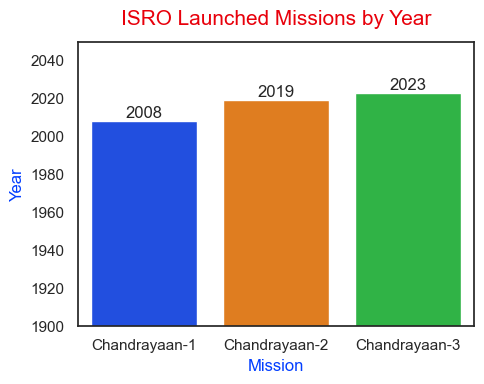

In [78]:
sns.set_theme(style="white",palette='bright')
plt.figure(figsize=(5,4),dpi=100)
a=sns.barplot(data=india, x='Mission', y='Converted Year')
for i in a.containers:
    a.bar_label(i,fmt='%.0f')
a.axis(ymin=1900,ymax=2050)
plt.title("ISRO Launched Missions by Year", color='r',size=15,pad=12)
plt.xlabel('Mission',color='b')
plt.ylabel('Year',color='b')
plt.tight_layout()
plt.show()